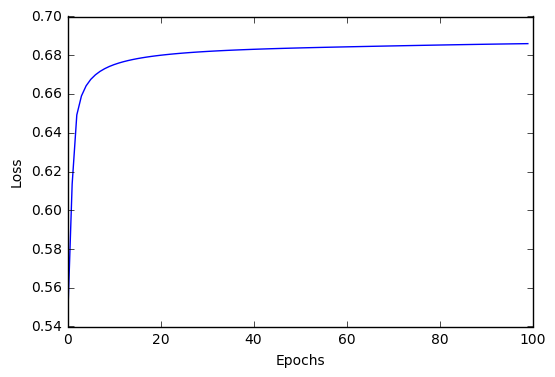

In [60]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt



class MyMLP():
    def __init__(self, params=None):
        'If params is None the MLP is initialized with default values.'
        if params == None:
            self.alpha = 0.25
            self.n_nlayer = np.array([4,6,5,3,3])#numero de neuronas por layer
            self.w = []
            self.bias = []
            for i in range(len(self.n_nlayer[1:])): #ctdad de layer -1
                self.w.append(np.random.randn(self.n_nlayer[i], self.n_nlayer[i+1])*0.05)
                self.bias.append(np.random.randn(self.n_nlayer[i + 1]))
            self.func_act = 'sigmoide'
        else:
            self.alpha = params[0]
            self.n_nlayer = params[1]
            self.w = params[2]
            self.bias = params[3]
            self.func_act = params[4]
        # Build layers
        self.net = []
        self.out_layers = []
        self.dE = []
        [self.net.append(np.transpose(np.zeros(i))) for i in self.n_nlayer[1:]]   #ctdad de neuronas a partir de la 2da
        [self.out_layers.append(np.transpose(np.zeros(i))) for i in self.n_nlayer] #ctdad de neuronas en cada layer
        [self.dE.append(np.zeros(self.n_nlayer[i + 1])) for i in range(len(self.n_nlayer[1:]))]
        self.E = []

    def propagate(self, X):
        ''' Propagate data from input layer to output layer. '''
        self.out_layers[0] = X  #Capa de entrada
        for i in range(len(self.n_nlayer[1:])): #cada layer (a partir de la 1ra hidden)
            self.net[i] = self.w[i].T.dot(self.out_layers[i]) + self.bias[i]  #salida de cada neuron
            self.out_layers[i+1] = self.fnc_act(self.net[i], self.func_act)  #salida de cada capa

    def learn(self, X, y):
        error = abs(y - self.out_layers[-1])  # |y - y_hat|
        self.carga_Error(error)  # .5|y - y_hat|^2
        self.dE[-1] = np.array([o*(1-o)*error[i] for i,o in enumerate(self.out_layers[-1])]) #delta de la capa de salida
        #self.dE[-1] = self.der_func_act(self.net[-1], self.func_act) * error
        #self.E.append(0.5 * np.sum((error * self.dE[-1]) ** 2))
        
        #Paso del error hacia atras (Backpropagation)
        for lh in reversed(range(len(self.n_nlayer[2:]))):  # - capa de entrada y capa de salida
            der_func = self.out_layers[lh+1]*(1-self.out_layers[lh+1]) #self.der_func_act(self.net[lh], self.func_act)
            for n_lh in range(len(self.dE[lh])):   # nodo en cada capa lh
                sumatoria = np.dot(self.w[lh+1][n_lh,:].T,self.dE[lh+1])
                self.dE[lh][n_lh] = der_func[n_lh]*sumatoria
        #Actualizacion de los pesos
        for i in range(len(self.w)):
            self.w[i] = self.w[i] - self.alpha*(np.dot(self.out_layers[i+1].T,self.dE[i]))
            self.bias[i] = self.bias[i] + self.alpha*self.dE[i]

    def carga_Error(self,error):
        self.E.append(0.5 * np.sum((error) ** 2))  # .5|y - y_hat|^2
    
    def load_dataset(self, params=None):
        if params == None:
            iris_data = load_iris()
            self.n_samples,self. n_features = iris_data.data.shape
            self. X = iris_data.data
            self.Y = iris_data.target
        else:
            self.X = params[0]
            self.Y = params[1]
            self.n_samples, self.n_features = params[2]
        
        (ind_train, ind_teste, ind_valid) =  self.dataset_Divided(self.X, self.Y, self.n_samples)
        self.X_1 = self.X[ind_train]
        self.X_2 = self.X[ind_teste]
        self.X_3 = self.X[ind_valid]
        self.Y_1 = self.Y[ind_train]
        self.Y_2 = self.Y[ind_teste]
        self.Y_3 = self.Y[ind_valid]
            
    def dataset_Divided(self, X, Y, n_samples, pc_train = 75, pc_teste = 15, pc_valid = 5):
        indices = list(range(n_samples))
        [np.random.shuffle(indices) for i in range(3)]
        top_train = int(np.ceil(n_samples*pc_train/100))
        top_teste = int(np.ceil(n_samples*(pc_train+pc_teste)/100))
        ind_train = indices[:top_train]
        ind_teste = indices[top_train:top_teste]
        ind_valid = indices[top_teste:]
        return (ind_train, ind_teste, ind_valid)
    
    
    def fnc_act(self, n, func):
        n = np.array(n)
        if func == 'degrau':  # degrau
            return (n >= 0)*1
        elif func == 'sigmoide':  # sigmoide
            return (1 / (1 + np.exp(-5*n)))
        elif func == 'lineal':
            return n
        elif func == 'ReLU':
            return np.maximum(0, n)
        elif func == 'tanh':
            return np.tanh(n)

    def der_func_act(self, n, func):
        dn = np.array(n)
        if func == 'degrau':  # degrau
            return (dn >= 0)*1
        elif func == 'sigmoide':  # sigmoide
            y = self.fnc_act(dn, 'sigmoide')
            return 5*y*(1-y)
        elif func == 'lineal':
            return 1
        elif func == 'ReLU':
            return (dn >= 0)*1
        elif func == 'tanh':
            return (1-(np.tan(dn)**2))

        
#INICIO

MLP = MyMLP()
MLP.load_dataset()

arr_Y = [[1,0,0], [0,1,0], [0,0,1]]
indX1 = list(range(len(MLP.Y_1)))
indX2 = list(range(len(MLP.Y_2)))
indX3 = list(range(len(MLP.Y_3)))

epochs =100
E_X1 = []
E_X2 = []
E_X3 = []
#Train
for e in range(epochs):
    #n = np.random.randint(MLP.n_samples)
    #TRAIN
    np.random.shuffle(indX1)
    for i in indX1:
        MLP.propagate(MLP.X_1[i])
        MLP.learn(MLP.X_1[i], arr_Y[MLP.Y_1[i]])
    E_X1.append(np.average(MLP.E))
    MLP.E = []
    #TESTE
    np.random.shuffle(indX2)
    for i in indX2:
        MLP.propagate(MLP.X_1[i])
        MLP.learn(MLP.X_2[i], arr_Y[MLP.Y_2[i]])
    E_X2.append(np.average(MLP.E))
    MLP.E = []
    #VALIDATION
    np.random.shuffle(indX3)
    for i in indX3:
        MLP.propagate(MLP.X_3[i])
        MLP.carga_Error(abs(arr_Y[MLP.Y_3[i]]- MLP.out_layers[-1]))
        #print(MLP.X_3[i], " |", arr_Y[MLP.Y_3[i]], "  | ", MLP.out_layers[-1], " | ", MLP.dE[-1])
    E_X3.append(np.average(MLP.E))
    MLP.E = []


plt.plot(range(len(E_X1)), E_X1)
#plt.plot(range(len(E_X2)), E_X2)
#plt.plot(range(len(E_X3)), E_X3)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [55]:
a = [1,2,3,4,5,6]
a[3:5]

[4, 5]